# Scikit-learn ile Makine Öğrenmesi (Tahminleme)

**Açıklamalar:**
* Stackoverflow'un 2019 yılı için geliştiricilerle yaptığı anket sonuçlarını içeren "survey_results_public.csv" adlı dosya kullanılacaktır.
* Sorularda verilen her tahmin problemi için aşağıdaki işlemler adım adım gerçekleştirilecektir:
  1. Her tahmin modeli için kullanılması gereken öznitelikleri (çıktı değişkeni üzerinde etkisi olduğunu düşündüğünüz öznitelikleri) belirleyiniz.
  2. Kategorik olan sütunları one-hot encoding yöntemi ile dönüştürünüz. Örneğin:
  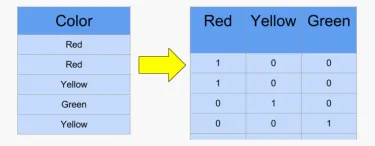
  3. Kategorik olmayan sütunlarda boş veri varsa uygun doldurma yöntemi (imputation) ile doldurunuz ya da ilgili satırları ihmal ediniz.
  4. Problem bir **regresyon problemi** ise k-fold cross-validation ile probleme uygun metrikler kullanarak tahmin modelinizin performansını değerlendiriniz ve hangi özniteliklerin çıktı değişkenini daha fazla etkilediğini yorumlayınız. Problem bir **sınıflandırma problemi** ise modelde kullanılacak hyper-parametre aramasını k-fold cross-validation ile yaparak (GridSearchCV modülünü kullanabilirsiniz), test verisi üzerinde probleme uygun metrikler kullanarak tahmin modelinizin performansını değerlendiriniz.
  5. Veri setinde olmayan yeni bir veri için geliştirdiğiniz model üzerinden bir tahminleme yapınız.


### 1: Bir geliştiricinin açık kaynak yazılımlara katkıda bulunup bulunmadığının (```OpenSourcer```) tahminlenmesi
* "```Never```" ve "```Less than once per year```" yanıtları "```Katkıda bulunmuyor```", "```Less than once a month but more than once per year```" ve "```Once a month or more often```" yanıtları  "```Katkıda bulunuyor```" şeklinde ele alınmalıdır.

In [10]:
import pandas as pd
import numpy as np
#"survey_results_public.csv" adlı dosyayı okuyarak df adlı DataFrame'e aktarma
df=pd.read_csv("survey_results_public.csv")

In [11]:
#kullanacağım sütunları seçiyorum
kullan_1 = ['OpenSourcer','MainBranch','OpenSource']
#verisetimden kullandığım satırlar için nan satırları siliyorum ve temp_1 e aktarıyorum
temp_1 = df[kullan_1].dropna()
#karkıları 0 ve 1 olarak değiştiriyorum
temp_1.replace({  "Never" : 0,
                  "Less than once per year" : 0,
                  "Less than once a month but more than once per year" : 1,
                "Once a month or more often" : 1}, inplace=True)
#özniteliklerim
ozel_1=['MainBranch','OpenSource']
#öznitelikleri one hot haline getirdim
one_hot_1 = pd.get_dummies(temp_1[ozel_1])
one_hot_1

,MainBranch_I am a developer by profession,MainBranch_I am a student who is learning to code,"MainBranch_I am not primarily a developer, but I write code sometimes as part of my work",MainBranch_I code primarily as a hobby,"MainBranch_I used to be a developer by profession, but no longer am","OpenSource_OSS is, on average, of HIGHER quality than proprietary / closed source software","OpenSource_OSS is, on average, of LOWER quality than proprietary / closed source software",OpenSource_The quality of OSS and closed source software is about the same
0,0,1,0,0,0,0,0,1
1,0,1,0,0,0,0,0,1
2,0,0,1,0,0,0,0,1
3,1,0,0,0,0,0,0,1
4,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...
88326,1,0,0,0,0,0,0,1
88327,0,0,1,0,0,0,0,1
88328,1,0,0,0,0,1,0,0
88329,1,0,0,0,0,0,1,0


In [12]:
#öznitelik değerlerini X e atadım
X = one_hot_1.loc[:].values
#katkı değerlerini y ye atadım
y=temp_1.OpenSourcer.values
#verisetini eğitim ve test e bölme
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

In [13]:
#ilk olarak logisticregression kullanarak verilerimi eğitiyorum
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)
#test seti hakkında tahminleme
y_pred= classifier.predict(X_test)

In [14]:
#logisticregressiona göre başarı oranı
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.646479851783233

In [15]:
#karar ağacı
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
accuracy_score(y_test, y_pred2)

0.646479851783233

In [16]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)
y_pred3= classifier3.predict(X_test)
accuracy_score(y_test, y_pred3)

0.646479851783233

In [17]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)
accuracy_score(y_test, y_pred4)

0.6309634089856415

In [18]:
#logisticregression seçiyorum yüksek olanlardan biri
#Verisetinde Olmayan verilerle tahmin
# X e benzetmek için one_hot_1 verisetinin sütunlarına göre kafama göre yeni veriler koyuyorum
olmayan_1=classifier.predict(np.array([0,0,0,1,0,0,1,0]).reshape(1,-1))
#katkıları 0(bulunmuyor) ve 1(bulunuyor) olarak değiştirmiştim
if(olmayan_1[0]==0):
    sonuc="KATKIDA BULUNMUYOR"
else:
    sonuc="KATKIDA BULUNUYOR"
print("veri setinde olmayan veri için açık kaynağa katkı tahmini : ",sonuc)

veri setinde olmayan veri için açık kaynağa katkı tahmini :  KATKIDA BULUNMUYOR


### 2: Bir geliştiricinin genel olarak, şu ana kadarki kariyerinden memnuniyet derecesinin (```CareerSat```) tahminlenmesi

In [19]:
#kullanacağım sütunların değerleri nasıl kategorilenmiş onları görmek için value_counts() yapıyorum her birine
df['CareerSat'].value_counts()

Very satisfied                        29173
Slightly satisfied                    25018
Slightly dissatisfied                  7670
Neither satisfied nor dissatisfied     7252
Very dissatisfied                      3734
Name: CareerSat, dtype: int64

In [20]:
df['WorkRemote'].value_counts()

Less than once per month / Never                           30220
A few days each month                                      17242
All or almost all the time (I'm full-time remote)           8465
Less than half the time, but at least one day each week     6320
It's complicated                                            3675
More than half, but not all, the time                       2376
About half the time                                         1986
Name: WorkRemote, dtype: int64

In [21]:
df['JobSat'].value_counts()

Slightly satisfied                    24207
Very satisfied                        22452
Slightly dissatisfied                 10752
Neither satisfied nor dissatisfied     8720
Very dissatisfied                      4857
Name: JobSat, dtype: int64

In [22]:
#kullanacağım sütunları seçiyorum
kullan_2 = ['CareerSat','WorkRemote','JobSat']
#verisetimden kullandığım satırlar için nan satırları siliyorum
temp_2 = df[kullan_2].dropna()
#memnuniyetleri sayılarla değiştiriyorum
temp_2['CareerSat'].replace({  "Very dissatisfied" : 0,
                  "Slightly dissatisfied" : 1,
                  "Neither satisfied nor dissatisfied" : 2,
                "Very satisfied" : 3,
                "Slightly satisfied" : 4}, inplace=True)
#özniteliklerim
ozel_2=['WorkRemote','JobSat']
one_hot_2 = pd.get_dummies(temp_2[ozel_2])
one_hot_2

,WorkRemote_A few days each month,WorkRemote_About half the time,WorkRemote_All or almost all the time (I'm full-time remote),WorkRemote_It's complicated,"WorkRemote_Less than half the time, but at least one day each week",WorkRemote_Less than once per month / Never,"WorkRemote_More than half, but not all, the time",JobSat_Neither satisfied nor dissatisfied,JobSat_Slightly dissatisfied,JobSat_Slightly satisfied,JobSat_Very dissatisfied,JobSat_Very satisfied
2,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0
4,1,0,0,0,0,0,0,0,1,0,0,0
5,1,0,0,0,0,0,0,0,0,1,0,0
6,0,0,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
88326,0,0,0,0,0,1,0,1,0,0,0,0
88327,0,0,0,0,0,0,1,1,0,0,0,0
88328,1,0,0,0,0,0,0,1,0,0,0,0
88329,0,0,0,0,0,1,0,0,0,0,1,0


In [23]:
#öznitelik değerlerini X e atadım
X = one_hot_2.loc[:].values
#memnuniyet değerlerini y ye atadım
y=temp_2.CareerSat.values
#verisetini eğitim ve test e bölme
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

In [24]:
#ilk olarak logisticregression kullanarak verilerimi eğitiyorum
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)
#test seti hakkında tahminleme
y_pred= classifier.predict(X_test)

In [25]:
#logisticregressiona göre başarı oranı
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5787446504992867

In [26]:
#en yüksek logisticreggresyon ve randomforestclassificationn çıktı (ikisi de eşit)
#Verisetinde Olmayan verilerle tahmin
#  X e benzetmek için one_hot_2 verisetinin sütunlarına göre kafama göre yeni veriler koyuyorum
olmayan_2=classifier.predict(np.array([0,1,0,0,0,0,0,0,0,1,0,0]).reshape(1,-1))
#memnuniyetleri 0,1,2,3,4 olarak numaralandırmıştım
if(olmayan_2[0]==0):
    sonuc="Very dissatisfied"
elif(olmayan_2[0]==1):
    sonuc="Slightly dissatisfied"
elif(olmayan_2[0]==2):
    sonuc="Neither satisfied nor dissatisfied"
elif(olmayan_2[0]==3):
    sonuc="Very satisfied"
else:
    sonuc="Slightly satisfied"
print("veri setinde olmayan veri için memnuniyet tahmini :   ",sonuc)

veri setinde olmayan veri için memnuniyet tahmini :    Slightly satisfied


### 3: Bir geliştiricinin USD cinsinden mevcut yıllık toplam gelirinin (```ConvertedComp```) tahminlenmesi

In [27]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import numpy as np
from sklearn.model_selection import train_test_split
#Burda gelir için Regresyon yapacağım
#kullanılacak sütunları seçiyorum
#kullan_3 = ['ConvertedComp','CodeRevHrs','YearsCode','CompTotal','YearsCodePro'] -->RMSE  282127,9....
#kullan_3=['ConvertedComp','CompTotal']  -->  RMSE  280341,7....
#kullan_3 = ['ConvertedComp','CompTotal','CompFreq']   RMSE 256913,4...
kullan_3 = ['ConvertedComp','CompTotal','CompFreq','WorkWeekHrs'] #RMSE 254738,2..random forest olunca daha başarılı oldu:%53
#verisetimden kullandığım satırlar için nan satırları siliyorum
temp_3 = df[kullan_3].dropna()
#özniteliklerimden kategorik olan sütunu one hot a çevirmek için alıyorum
ozel_3=['CompFreq']
#kategorik olan sütunu one-hot haline getiriyorum
one_hot_3 = pd.get_dummies(temp_3[ozel_3])
#beraber aynı verisetini kullanmak için önceki verisetinden CompTotal ve WorkWeekHrs sütunlarını one_hot_3 verisetine ekliyorum
one_hot_3['CompTotal2']=temp_3['CompTotal']
one_hot_3['WorkWeekHrs2']=temp_3['WorkWeekHrs']
one_hot_3

,CompFreq_Monthly,CompFreq_Weekly,CompFreq_Yearly,CompTotal2,WorkWeekHrs2
2,1,0,0,23000.0,40.00
3,0,0,1,61000.0,80.00
5,1,0,0,40000.0,15.00
8,0,0,1,138000.0,32.00
9,0,0,1,950000.0,70.00
...,...,...,...,...,...
88325,0,0,1,130000.0,40.00
88326,1,0,0,6000.0,37.75
88328,0,0,1,60000.0,39.00
88329,1,0,0,42768.0,40.00


In [28]:
#X e özniteliklerimi y ye gelirleri aktardım
X = one_hot_3.loc[:].values
y = temp_3.ConvertedComp
#verisetini eğitim ve test e bölme
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

In [29]:
#ilk olarak linearResgression kullanıyorum
linreg = LinearRegression()
#eğitim setindekileri eğitiyorum
linreg.fit(X_train, y_train)

LinearRegression()

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#test seti hakkında tahminleme
y_pred = linreg.predict(X_test)
#hata oranlarını ve başarı oranını buluyorum
mse_score = mean_squared_error(y_test, y_pred)
mae_score = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("LinearRegression için \n-------------------------")
print("MSE score:", mse_score)
print("MAE score:", mae_score)
print("RMSE score",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score:", r2)

LinearRegression için 
-------------------------
MSE score: 62681385719.094406
MAE score: 118067.07419577114
RMSE score 250362.50861319952
R2 score: 0.2189229819159335


In [31]:
#aynı şekilde Randomforestreggressor ü kullanıyorum başarı oranı artar mı???
from sklearn.ensemble import  RandomForestRegressor
ranfor = RandomForestRegressor()
ranfor.fit(X_train,y_train)
y_pred2 = ranfor.predict(X_test)

In [32]:
mse_score = mean_squared_error(y_test, y_pred2)
mae_score = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RandomForestRegressor için \n-------------------------")
print("MSE score:", mse_score)
print("MAE score:", mae_score)
print("RMSE score",np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("R2 score:", r2)
#başarı oranını Randomforestregressor ile daha yüksek buldum

RandomForestRegressor için 
-------------------------
MSE score: 36358402384.28852
MAE score: 70658.50584497167
RMSE score 190678.79374563004
R2 score: 0.5469354707011576


In [33]:
#RandomForestRegressor için başarı oranı daha fazla onu kullanacağım
#Verisetinde Olmayan verilerle tahmin
# X e benzetmek için sırasıyla [CompFreq_Monthly,CompFreq_Weekly,CompFreq_Yearly,CompTotal2,WorkWeekHrs2]
#değerleri kafama göre koyuyorum
olmayan_3=ranfor.predict(np.array([1,1,1,78000,21]).reshape(1,-1))
print("veri setinde olmayan veri için yıllık tahmini gelir :   ",olmayan_3[0]," USD")

veri setinde olmayan veri için yıllık tahmini gelir :    806892.0  USD


# 4: Türkiye'deki bir geliştiricinin mevcut yıllık toplam gelirinin (```ConvertedComp```)  18000 USD değerinden yüksek mi düşük mü olduğunun tahminlenmesi
* 18000 ve üstü "```Yüksek```", 18000 altı "```Düşük```" şeklinde ele alınmalıdır.

In [34]:
#sınıflandırma problemi!!!
#kullanılacak sütunları seçiyorum
kullan_4 = ['ConvertedComp','CompTotal','CompFreq','Country']
#verisetimden kullandığım satırlar için nan satırları siliyorum
temp_4 = df[kullan_4].dropna()
#sadece Türkiyeden olanları seçiyorum
temp_4=temp_4[temp_4['Country'].str.contains('Turkey').fillna(False)]
#toplam gelirleri 18000 den büyükse 1 , küçükse 0 olarak değiştiriyorum
temp_4['ConvertedComp']=(temp_4['ConvertedComp']>=18000).astype(int)
temp_4

,ConvertedComp,CompTotal,CompFreq,Country
122,1,8000.0,Monthly,Turkey
632,0,10000.0,Yearly,Turkey
696,1,10000.0,Monthly,Turkey
715,1,160000.0,Yearly,Turkey
800,1,12000.0,Monthly,Turkey
...,...,...,...,...
87657,0,4792.0,Monthly,Turkey
87750,1,20000.0,Monthly,Turkey
87804,1,15000.0,Monthly,Turkey
88078,0,7500.0,Monthly,Turkey


In [35]:
#ülke sütununu siliyorum bana lazım olmayacak
del temp_4['Country']

In [36]:
temp_4

,ConvertedComp,CompTotal,CompFreq
122,1,8000.0,Monthly
632,0,10000.0,Yearly
696,1,10000.0,Monthly
715,1,160000.0,Yearly
800,1,12000.0,Monthly
...,...,...,...
87657,0,4792.0,Monthly
87750,1,20000.0,Monthly
87804,1,15000.0,Monthly
88078,0,7500.0,Monthly


In [37]:
#verisetimde kategorik olan CompFreq sütununu one hot haline getirmek  için seçiyorum ve one hot haline getiriyorum
cevir_4=['CompFreq']
one_hot_4= pd.get_dummies(temp_4[cevir_4])
#beraber aynı verisetini kullanmak için önceki verisetinden CompTotal sütununu one_hot_4 verisetine ekliyorum
one_hot_4['CompTotal4']=temp_4['CompTotal']
one_hot_4

,CompFreq_Monthly,CompFreq_Weekly,CompFreq_Yearly,CompTotal4
122,1,0,0,8000.0
632,0,0,1,10000.0
696,1,0,0,10000.0
715,0,0,1,160000.0
800,1,0,0,12000.0
...,...,...,...,...
87657,1,0,0,4792.0
87750,1,0,0,20000.0
87804,1,0,0,15000.0
88078,1,0,0,7500.0


In [38]:
#X e özniteliklerimi y ye gelirleri aktardım
X = one_hot_4.loc[:].values
y=temp_4.ConvertedComp.values
#verisetini eğitim ve test e bölme
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)

In [39]:
#ilk olarak logisticregression kullanarak verilerimi eğitiyorum
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train,y_train)
#test seti hakkında tahminleme
y_pred= classifier.predict(X_test)
#logisticregressiona göre başarı oranı
accuracy_score(y_test, y_pred)

0.6078431372549019

In [40]:
#karar ağacı
from sklearn.tree import DecisionTreeClassifier
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier2.fit(X_train, y_train)
y_pred2 = classifier2.predict(X_test)
accuracy_score(y_test, y_pred2)

1.0

In [41]:
#Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
classifier3 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier3.fit(X_train, y_train)
y_pred3= classifier3.predict(X_test)
accuracy_score(y_test, y_pred3)

1.0

In [42]:
#K-NN
from sklearn.neighbors import KNeighborsClassifier
classifier4 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier4.fit(X_train, y_train)
y_pred4 = classifier4.predict(X_test)
accuracy_score(y_test, y_pred4)

1.0

In [43]:
#Burda  karar ağacı,karar ağacı ve K-NN de başarı oranını %100 buldum karar ağacını seçiyorum
#Verisetinde Olmayan verilerle tahmin
# X e benzetmek için sırasıyla [CompFreq_Monthly,CompFreq_Weekly,CompFreq_Yearly,CompTotal4] değerleri koyuyorum kafama göre
olmayan_4=classifier2.predict(np.array([1,0,0,16287]).reshape(1,-1))
#18000 den yüksek veya eşit değerlere 1 , düşük değerlere 0 vermiştim
if(olmayan_4[0]==0):
    sonuc="18000 den DÜŞÜK"
else:
    sonuc="18000 den YÜKSEK veya eşit"
print("veri setinde olmayan veri için gelirin 18000 USD den büyük/küçük tahmini :    ",sonuc)

veri setinde olmayan veri için gelirin 18000 USD den büyük/küçük tahmini :     18000 den YÜKSEK veya eşit


### 5: Bir geliştiricinin yıl olarak yaşının (```Age```) tahminlenmesi

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
#Burda yaş için Regresyon yapacağız!!!
#kullanılacak sütunları seçiyorum
kullan_5 = ['Age','CodeRevHrs','YearsCode','YearsCodePro']
#verisetimden kullandığım satırlar için nan satırları siliyorum
temp_5 = df[kullan_5].dropna()
#yaş için özniteliklerim
ozel_5=['CodeRevHrs','YearsCode','YearsCodePro']
#seçilen özniteliklerde yazı olan yerler için hata aldım ve buraları 0.5 ve 51 olarak değiştirdim
temp_5.replace({ "Less than 1 year" : 0.5,'More than 50 years':51}, inplace=True)

In [45]:
temp_5

,Age,CodeRevHrs,YearsCode,YearsCodePro
6,42.0,6.0,6,4
8,23.0,12.0,12,4
12,28.0,5.0,17,8
13,31.0,4.0,13,2
16,29.0,5.0,5,2
...,...,...,...,...
88323,23.0,3.0,8,2
88324,48.0,5.0,31,28
88325,26.0,3.0,12,3
88326,34.0,10.0,17,7


In [46]:
#X e özniteliklerimi y ye yaş ı aktardım
X = temp_5[ozel_5]
y = temp_5.Age
#verisetini eğitim ve test e bölme
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.1, random_state=1)
#ilk olarak linearResgression kullanıyorum
linreg = LinearRegression()

In [47]:
#eğitim setindekileri eğitiyorum
linreg.fit(X_train, y_train)

LinearRegression()

In [48]:
#test seti hakkında tahminleme
y_pred = linreg.predict(X_test)

In [49]:
#hata oranlarını ve başarı oranını buluyorum
mse_score = mean_squared_error(y_test, y_pred)
mae_score = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("LinearRegression için \n-------------------------")
print("MSE score:", mse_score)
print("MAE score:", mae_score)
print("RMSE score",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("R2 score:", r2)

LinearRegression için 
-------------------------
MSE score: 16.95413610253794
MAE score: 2.8540829295620775
RMSE score 4.117540054758173
R2 score: 0.7318997111710401


In [50]:
#aynı şekilde Randomforestreggressor ü kullanıyorum başarı oranı artar mı???
from sklearn.ensemble import  RandomForestRegressor
ranfor = RandomForestRegressor()
ranfor.fit(X_train,y_train)
y_pred2 = ranfor.predict(X_test)

In [51]:
#hata oranlarını ve başarı oranını buluyorum
mse_score = mean_squared_error(y_test, y_pred2)
mae_score = mean_absolute_error(y_test, y_pred2)
r2 = r2_score(y_test, y_pred2)
print("RandomForestRegressor için \n-------------------------")
print("MSE score:", mse_score)
print("MAE score:", mae_score)
print("RMSE score",np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("R2 score:", r2)

RandomForestRegressor için 
-------------------------
MSE score: 16.841362859666937
MAE score: 2.8789396082230994
RMSE score 4.103822956666983
R2 score: 0.7336830246234649


In [52]:
#RandomForestRegressor için başarı oranı daha fazla onu kullanacağım
#Verisetinde Olmayan verilerle tahmin
# X e benzetmek için sırasıyla [CodeRevHrs,YearsCode,YearsCodePro] değerleri koyuyorum kafama göre
olmayan_5=ranfor.predict(np.array([12,18,7]).reshape(1,-1))
print("veri setinde olmayan veri için yaş tahmini(yuvarladım) :   ",round(olmayan_5[0]))

veri setinde olmayan veri için yaş tahmini(yuvarladım) :    32.0
